In [ ]:
# first line is to print the graph not just calculating
# the data we used is https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# we will know number of rows and columns in the data
data.shape

(1460, 81)

<Axes: >

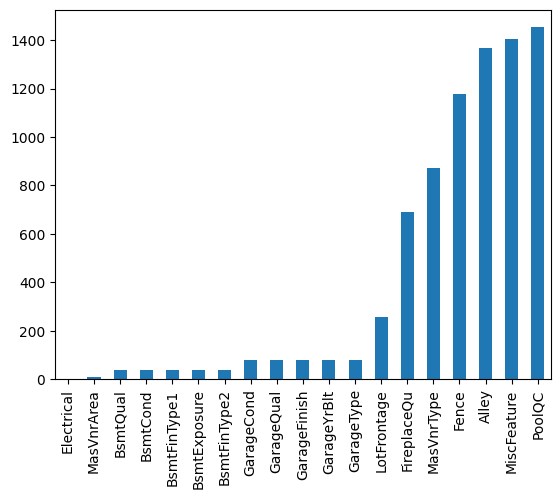

In [ ]:
# checking the null values in the complete data frame
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
# we got to know the number of missing values in each column where from lotfronatge to poolqc they are alot.
# as we can see total no. of rows are 1460 and for poolqc there are almost 1400 missing values
# so we can conclude that column is useless to predict the house price

<ipython-input-8-95a9e32a9f9e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], kde=True, bins =20)


<Axes: xlabel='SalePrice', ylabel='Density'>

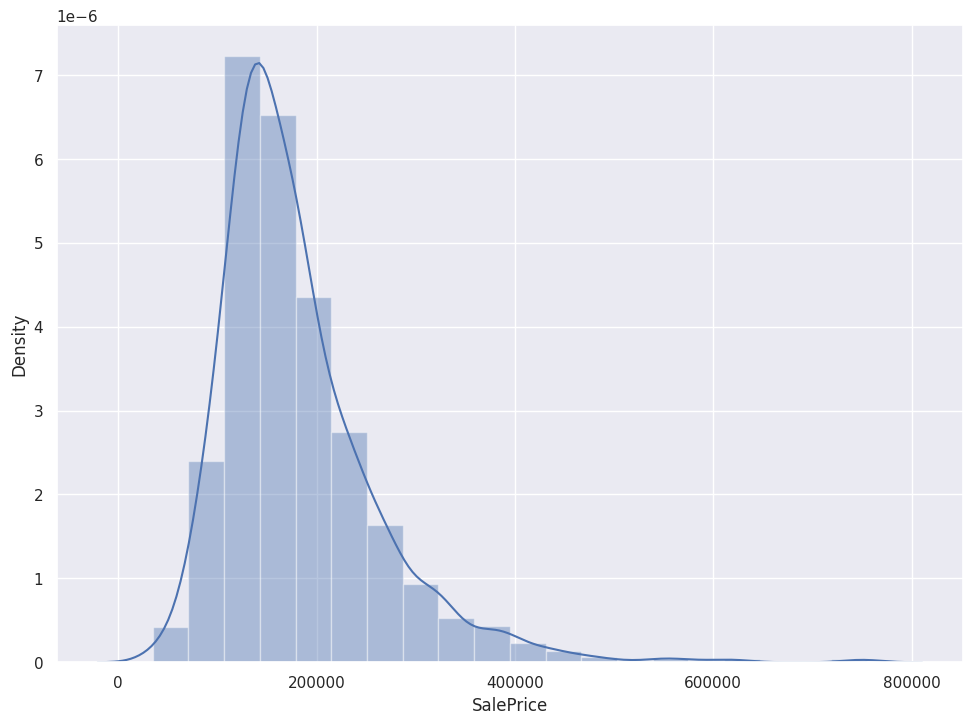

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['SalePrice'], kde=True, bins =20)

# here bins is that the data is divided in 20 intervals to visualise the data
# we can change it as per our wish
# we are using histogram to identify the skewness, detect outlier
# KDE helps better visualise the shape

In [ ]:
data['SalePrice'].describe()

# 50% or 50th percentile is median, here median < mean and the plot shown above
# right skewed

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: xlabel='SalePrice', ylabel='Density'>

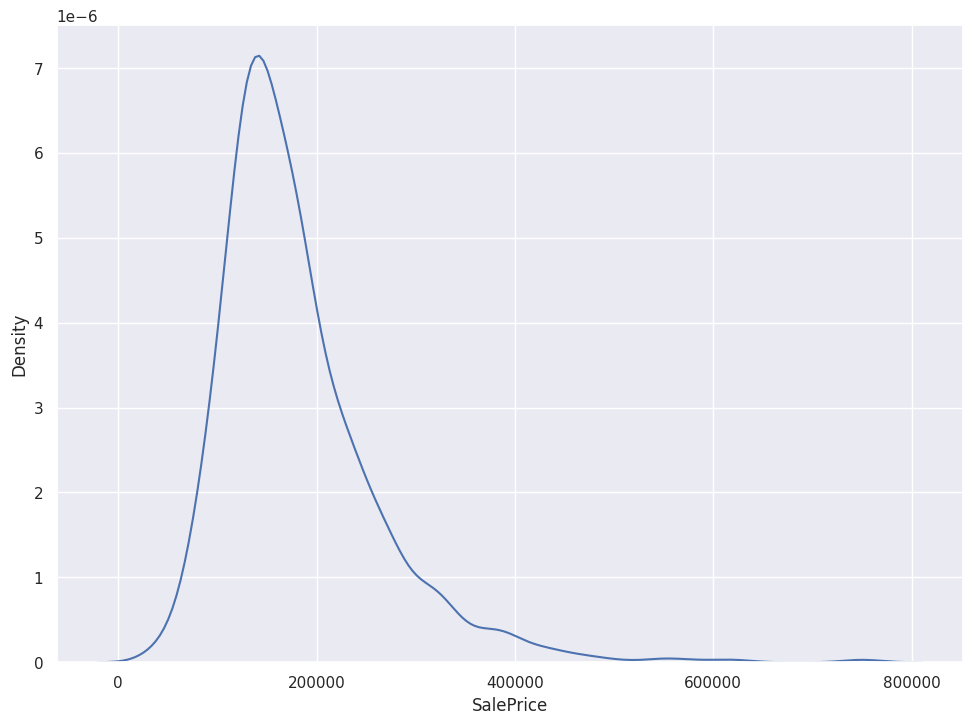

In [ ]:
sns.kdeplot(data['SalePrice'])

In [ ]:
# next step is correlation- correlation heatmap
# we will know which column has good relation with our target variable/column
# can choose by knowing which is better than randomly choosing
# we cant do correlation for categorical types(ordinal,nominal) but only for numerical

In [ ]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# correlation for just numeric data type columns
# this is between salesprice and every other numeric column
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: >

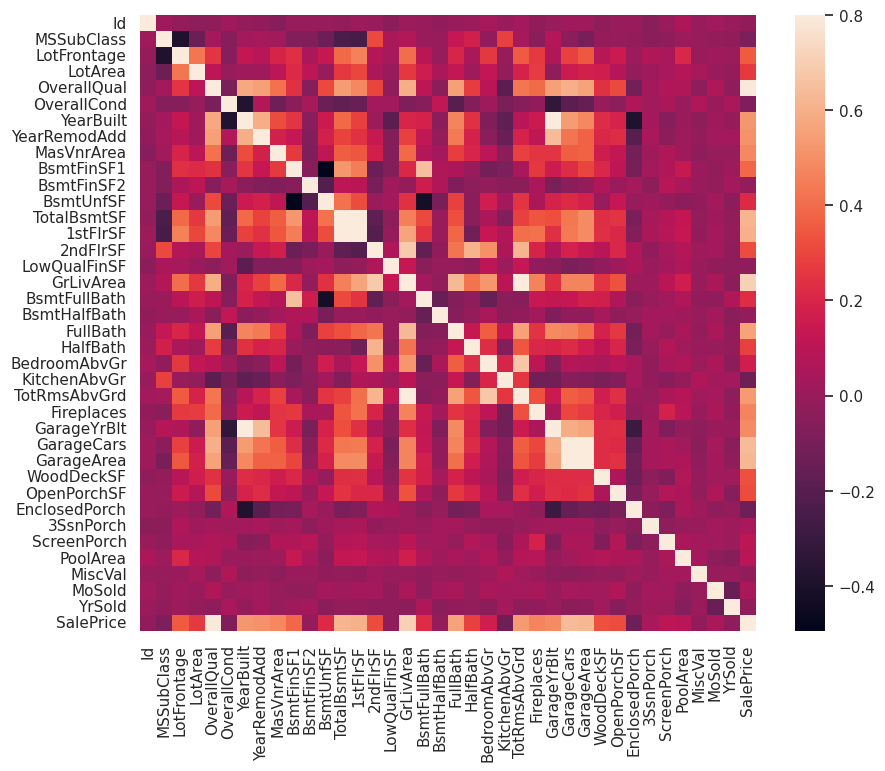

In [ ]:
f, ax= plt.subplots(figsize=(10,8))
sns.heatmap(correlation, vmax=.8, square=True)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

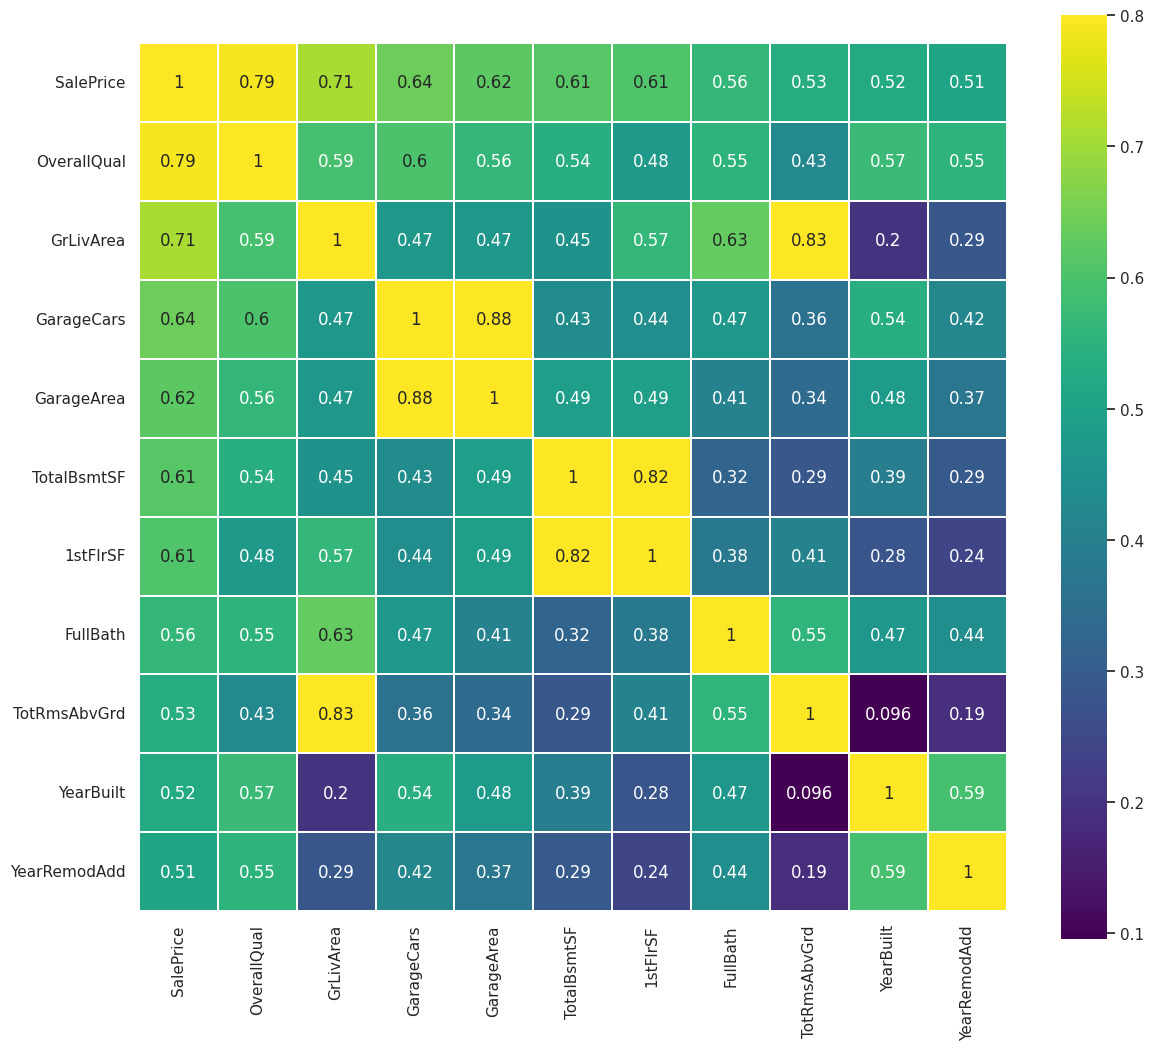

In [ ]:
# lets draw a heatmap only to specific no of columns
k =11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f,ax= plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=0.8,linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor='white',
            xticklabels=cols.values,yticklabels=cols.values,annot_kws={'size':12})


In [ ]:
# here multicollinearity arised which means 2 independent predicors/variables are
# highly correlated with target variable and higly correlated within themselves too.
# this is a disadvantage because its difficult to assess which predictor has
# more effect on target variable which will mislead the results.
# this destroys model performance, so soln is to just drop either one of them.
# GARAGE CARS - GARAGE AREA

In [ ]:
# @title Scatter Plot
# we can see the correlation, how two features varies with each other and we call also see outliers

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

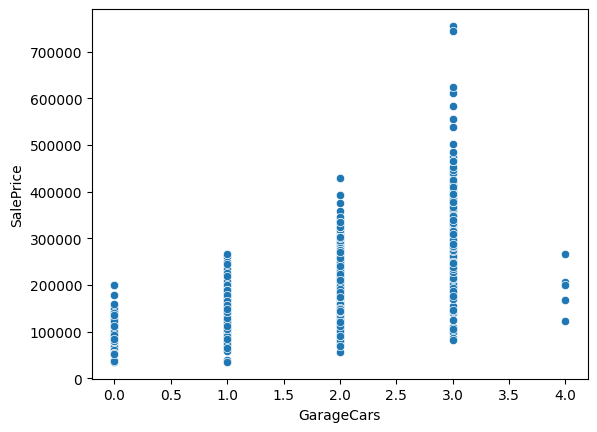

In [ ]:
sns.scatterplot(x=data['GarageCars'],y=data['SalePrice'])

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

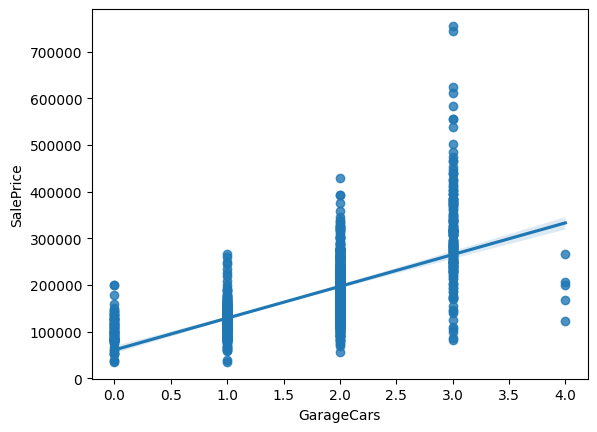

In [ ]:
# this is also a scatter plot but it is fitting a line, best thing is to to use regplot so that we can change the fir_red
# to true or false accordingly
sns.regplot(x=data['GarageCars'],y=data['SalePrice'],fit_reg=True)

<Axes: xlabel='FullBath', ylabel='SalePrice'>

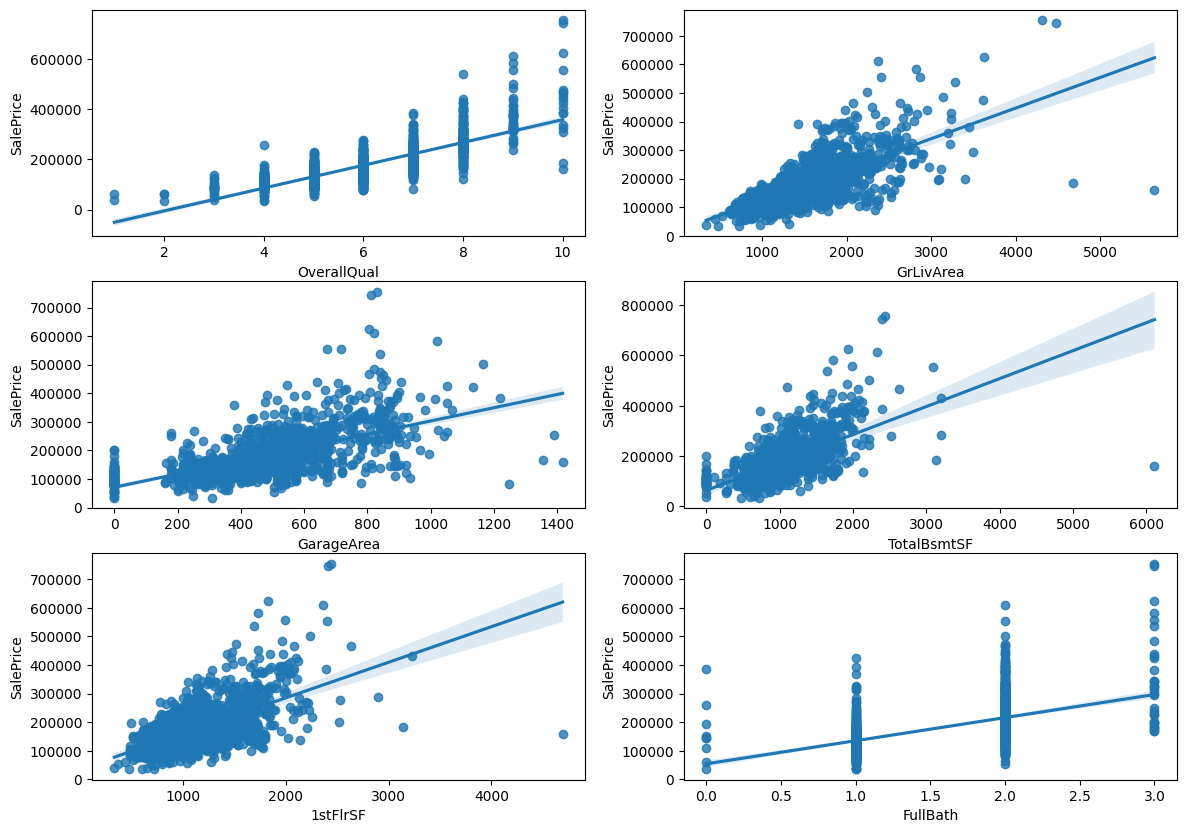

In [ ]:
# scatter plots between most correlated variables
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(14,10))
sns.regplot(x=data['OverallQual'],y=data['SalePrice'],fit_reg=True, ax = ax1)
sns.regplot(x=data['GrLivArea'],y=data['SalePrice'],fit_reg=True, ax=ax2)
sns.regplot(x=data['GarageArea'],y=data['SalePrice'],fit_reg=True, ax=ax3)
sns.regplot(x=data['TotalBsmtSF'],y=data['SalePrice'],fit_reg=True, ax=ax4)
sns.regplot(x=data['1stFlrSF'],y=data['SalePrice'],fit_reg=True, ax=ax5)
sns.regplot(x=data['FullBath'],y=data['SalePrice'],fit_reg=True, ax=ax6)

In [ ]:
# @title BoxPlot
# the quartiles in boxplot are used to divide the data into equal parts, and these help summarize
# the distribution of data
# we need min, max, median, 1st quartile/lower quartile, 3rd quartile/upper quartile to plot boxplot
# Interquartile range(IQR) = Q3-Q1

<Axes: xlabel='SalePrice'>

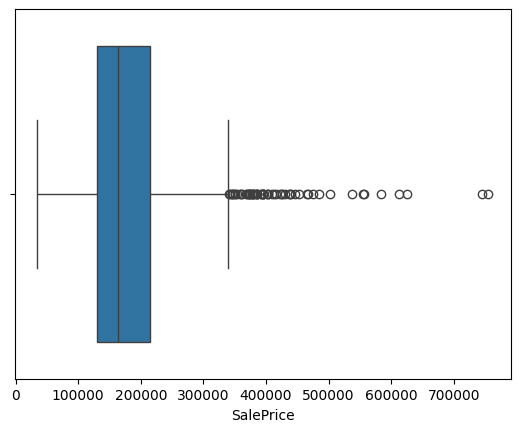

In [ ]:
sns.boxplot(x=data['SalePrice'])

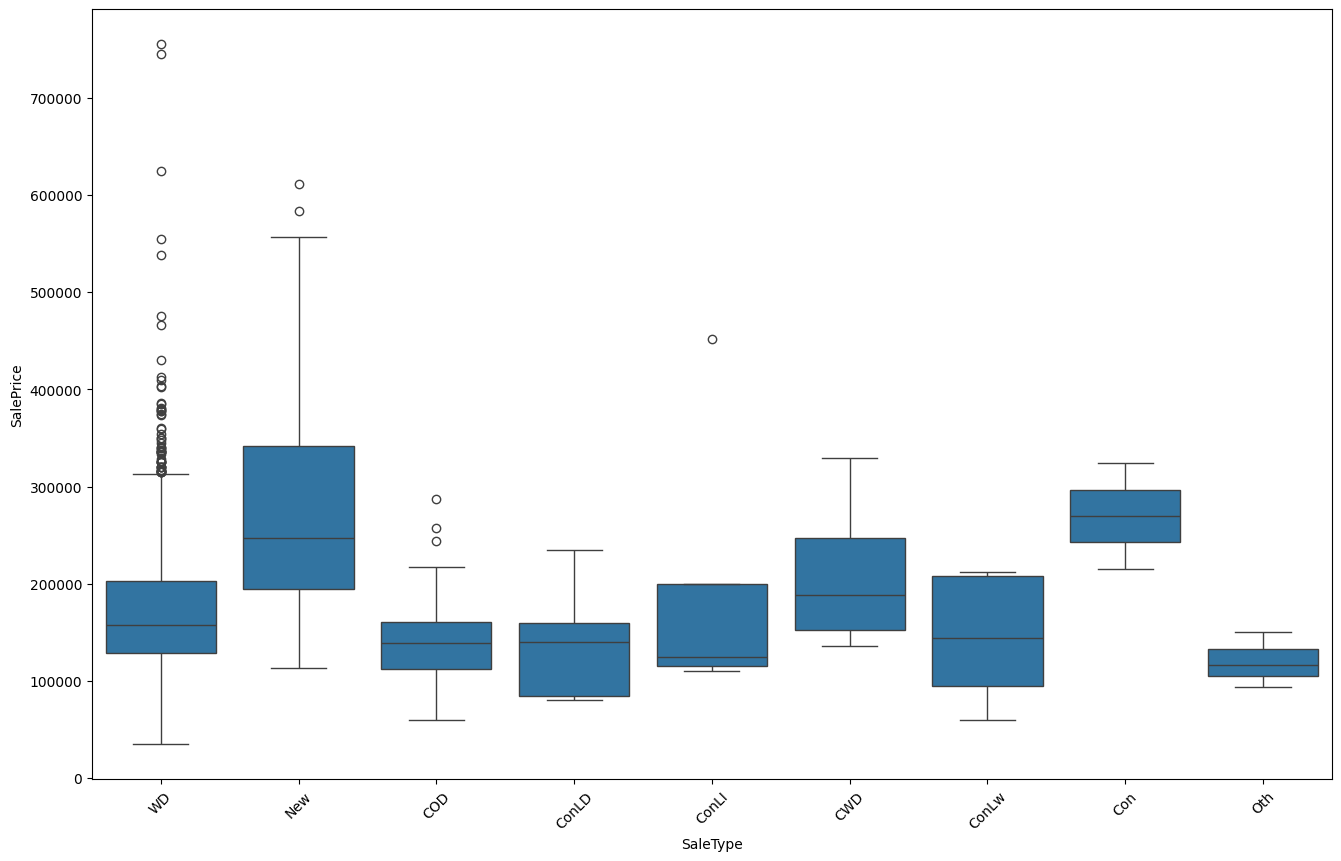

In [ ]:
f, ax = plt.subplots(figsize=(16,10))
ax = sns.boxplot(x=data['SaleType'],y=data['SalePrice'])
xt = plt.xticks(rotation=45)

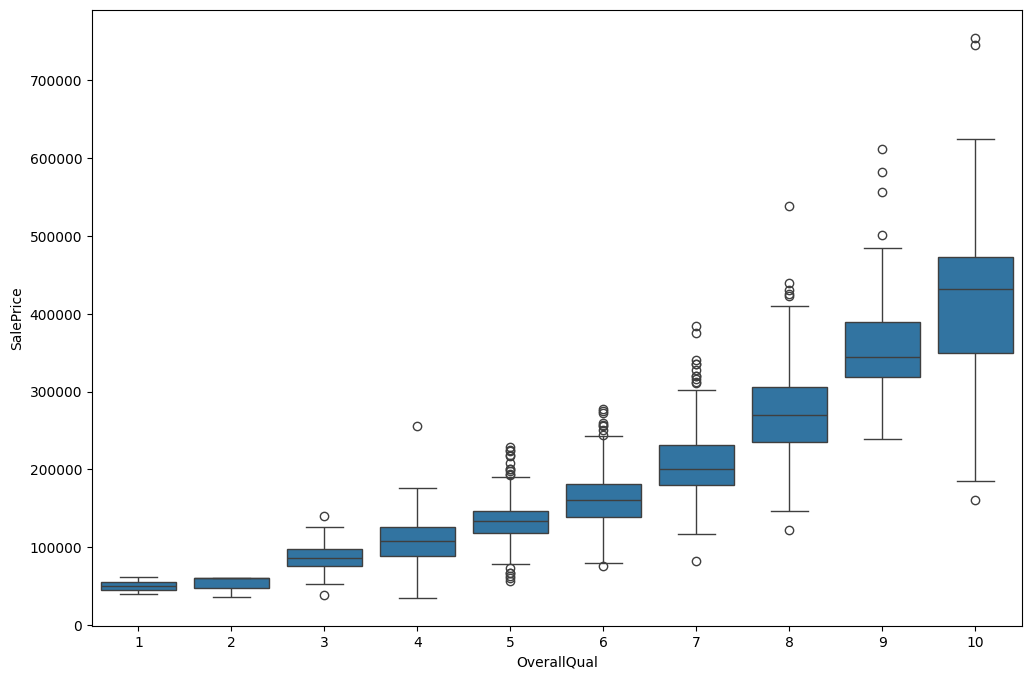

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=data['OverallQual'],y=data['SalePrice'])

In [ ]:
# @title Remove Outliers

In [ ]:
first_quartile = data['SalePrice'].quantile(0.25)
third_quartile = data['SalePrice'].quantile(0.75)
IQR = third_quartile - first_quartile

In [ ]:
new_boundary = third_quartile + 3*IQR

In [ ]:
data.drop(data[data['SalePrice'] > new_boundary].index,axis = 0,inplace  = True)

In [ ]:
data.shape

(1448, 81)

In [ ]:
# before removing outliers there are 1460 rows now there are 1448.
# that means we successfully removed outliers

In [ ]:
# @title Removing bad features from the data
# firstly, we have to remove muticollinear variables
# next, features with missing values more than 20%
# and last, features with poor correlation with target variable(SalesPrice)

In [ ]:
col_to_remove = ['BsmtFinSF1','LotFrontage', 'WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea',
'MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF',
                 'YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']

In [ ]:
# dropping these columns
data.drop(col_to_remove,axis=1,inplace=True)

In [ ]:
data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [ ]:
data.shape

(1448, 57)